In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [2]:
Laptop=pd.read_csv('laptops.csv',encoding='latin-1')

In [3]:
Laptop=Laptop.drop('Unnamed: 0',axis=1)

In [4]:
Laptop.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [5]:
Laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [6]:
Laptop.shape

(1303, 12)

Values of 64GB and 24GB were  almost negligibe so we have removed those

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Company', ylabel='count'>

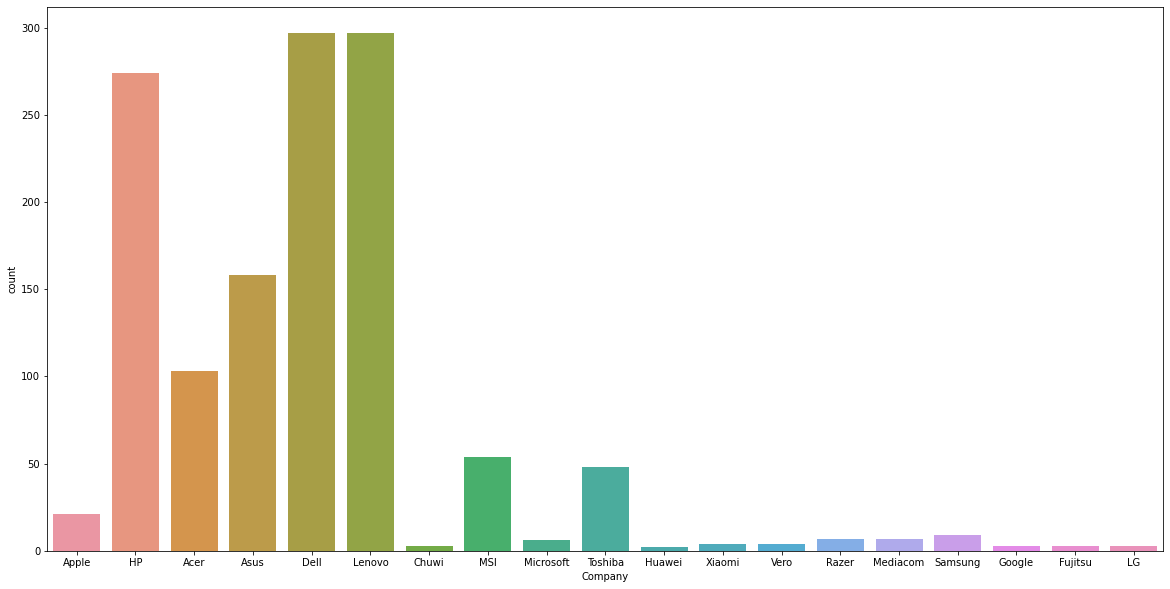

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(Laptop['Company'])

In [8]:
bins=[10,12,14,16,18]
labels = ['bin-1','bin-2','bin-3','bin-4']

Laptop['Inches_new']=pd.cut(Laptop['Inches'],bins = bins, labels = labels)


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


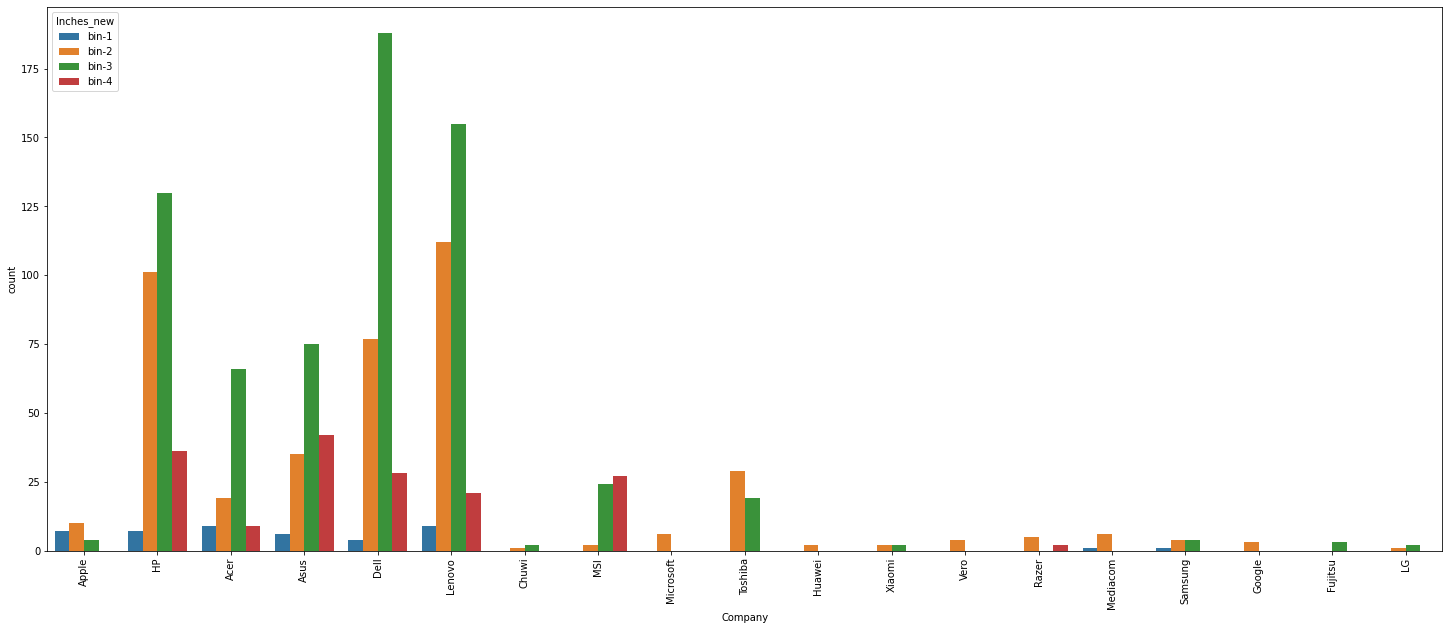

In [9]:
# Most of the sells laptops having inche size btn[14,16]

plt.figure(figsize=(25,10))
sns.countplot(Laptop['Company'],hue=Laptop['Inches_new'])
plt.xticks(rotation='vertical')
plt.show()

In [10]:
Laptop['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

screen resolution is the number of pixels a screen can show horizontally and vertically

Lets split the values from x in column Screen-resolution 

In [11]:
resolution=Laptop['ScreenResolution'].str.split('x',n=1,expand=True)

In [12]:
Laptop['x_res']=resolution[0]
Laptop['y_res']=resolution[1]

In [16]:
Laptop['x_res']=Laptop['x_res'].astype(int)
Laptop['y_res']=Laptop['y_res'].astype(int)


In [ ]:
Laptop.head(2)

In [15]:
Laptop['x_res']=Laptop['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x :x[0])

In [17]:
Laptop.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Inches_new,x_res,y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,bin-2,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,bin-2,1440,900


In [14]:
Laptop['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [18]:
Laptop['Cpu_Name']=Laptop['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [19]:
Laptop.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Inches_new,x_res,y_res,Cpu_Name
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,bin-2,2560,1600,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,bin-2,1440,900,Intel Core i5


In [20]:
Laptop['Cpu_Name'][20].split()[0]

'Intel'

In [21]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [22]:
Laptop['Cpu_Name']=Laptop['Cpu_Name'].apply(fetch_processor)

In [23]:
Laptop['Gpu']=Laptop['Gpu'].apply(lambda x: x.split()[0])

In [24]:
Laptop=Laptop[Laptop['Gpu']!='ARM']

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


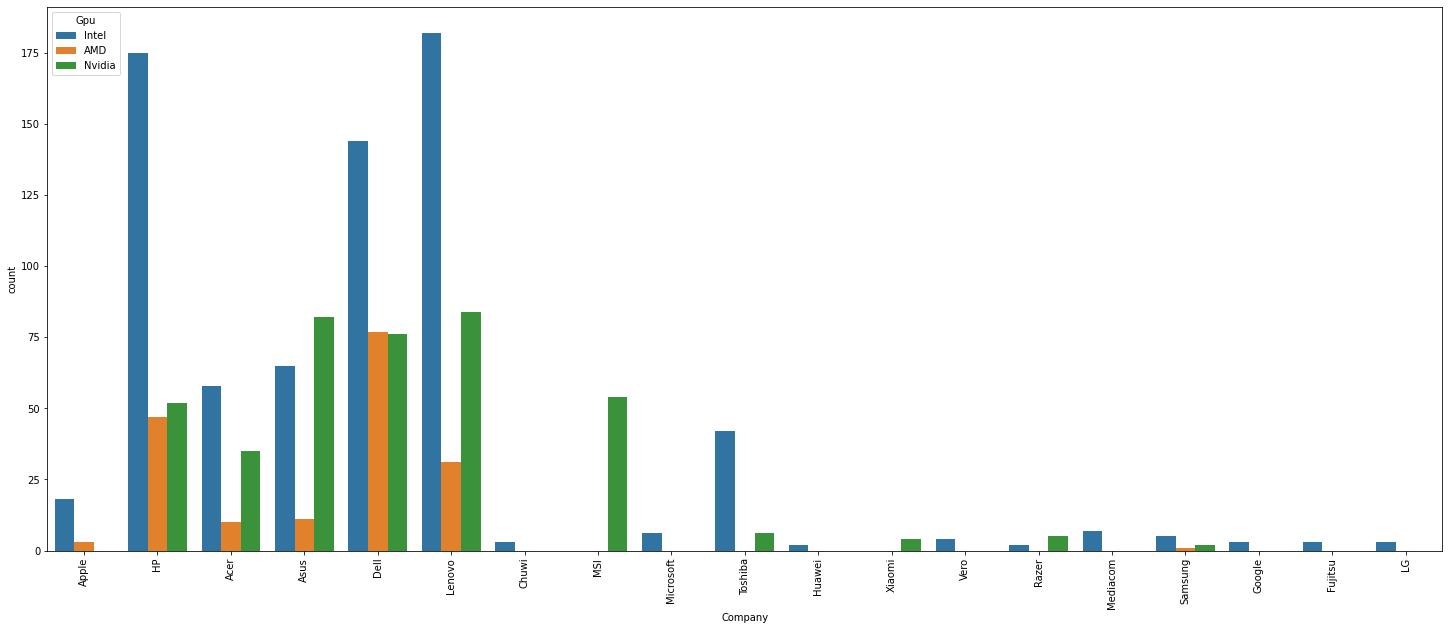

In [25]:
plt.figure(figsize=(25,10))
sns.countplot(Laptop['Company'],hue=Laptop['Gpu'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu', ylabel='Price_euros'>

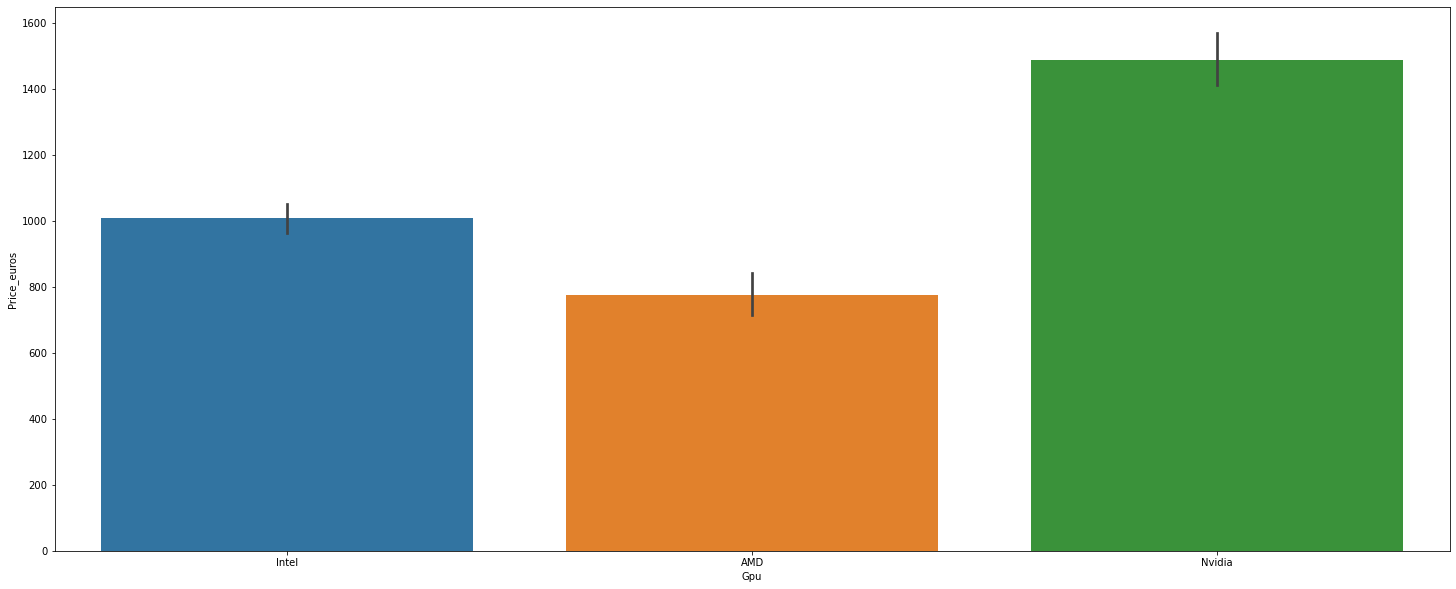

In [26]:
# Nivida is the most expensive Gpu 
plt.figure(figsize=(25,10))
sns.barplot(Laptop['Gpu'],Laptop['Price_euros'])

In [27]:
Laptop['TypeName']

0                Ultrabook
1                Ultrabook
2                 Notebook
3                Ultrabook
4                Ultrabook
               ...        
1298    2 in 1 Convertible
1299    2 in 1 Convertible
1300              Notebook
1301              Notebook
1302              Notebook
Name: TypeName, Length: 1302, dtype: object

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


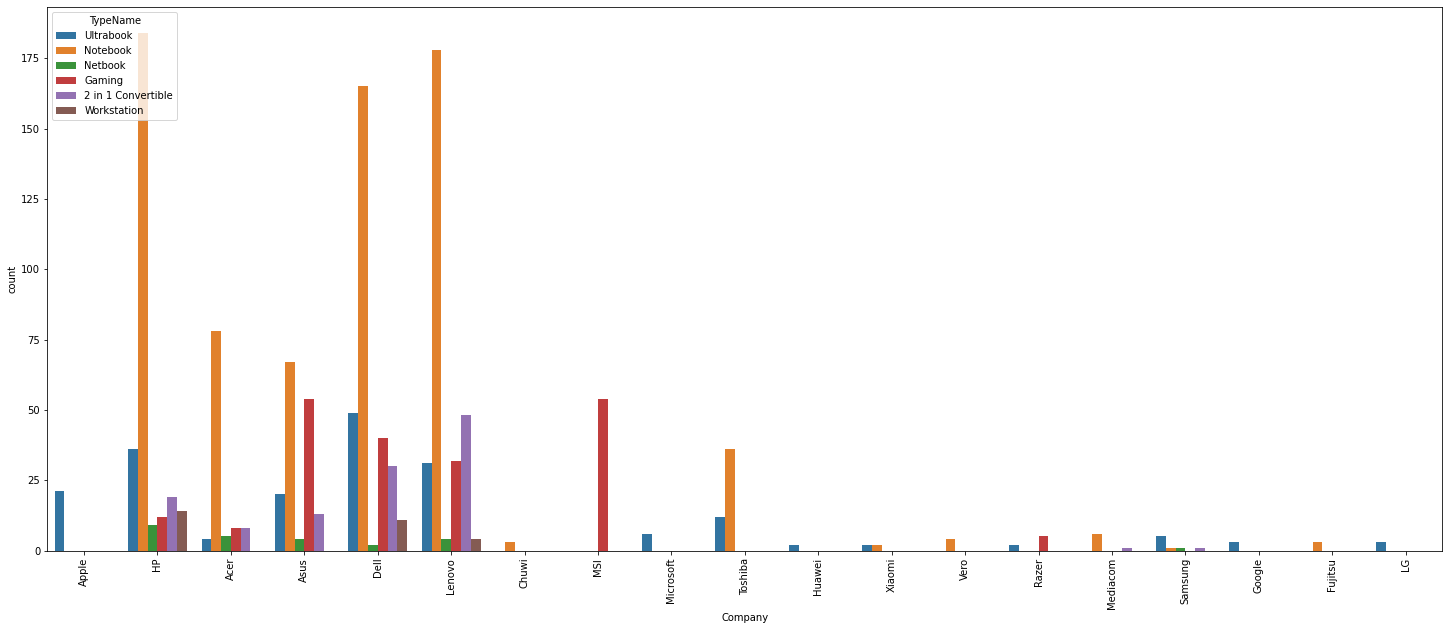

In [28]:
# Lets see How many Companeies are present
plt.figure(figsize=(25,10))
sns.countplot(Laptop['Company'],hue=Laptop['TypeName'])
plt.xticks(rotation='vertical')
plt.show()

From the above diagram we are able to predict that  which compamy dominated in which type of Laptop

<AxesSubplot:>

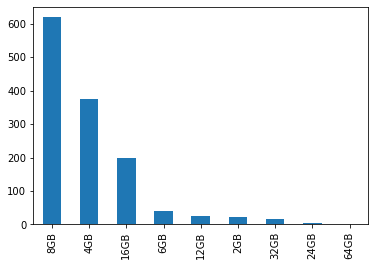

In [29]:
Laptop['Ram'].value_counts().plot(kind='bar')

In [30]:
Laptop=Laptop[Laptop['Ram']!='64GB']
Laptop=Laptop[Laptop['Ram']!='24GB']

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


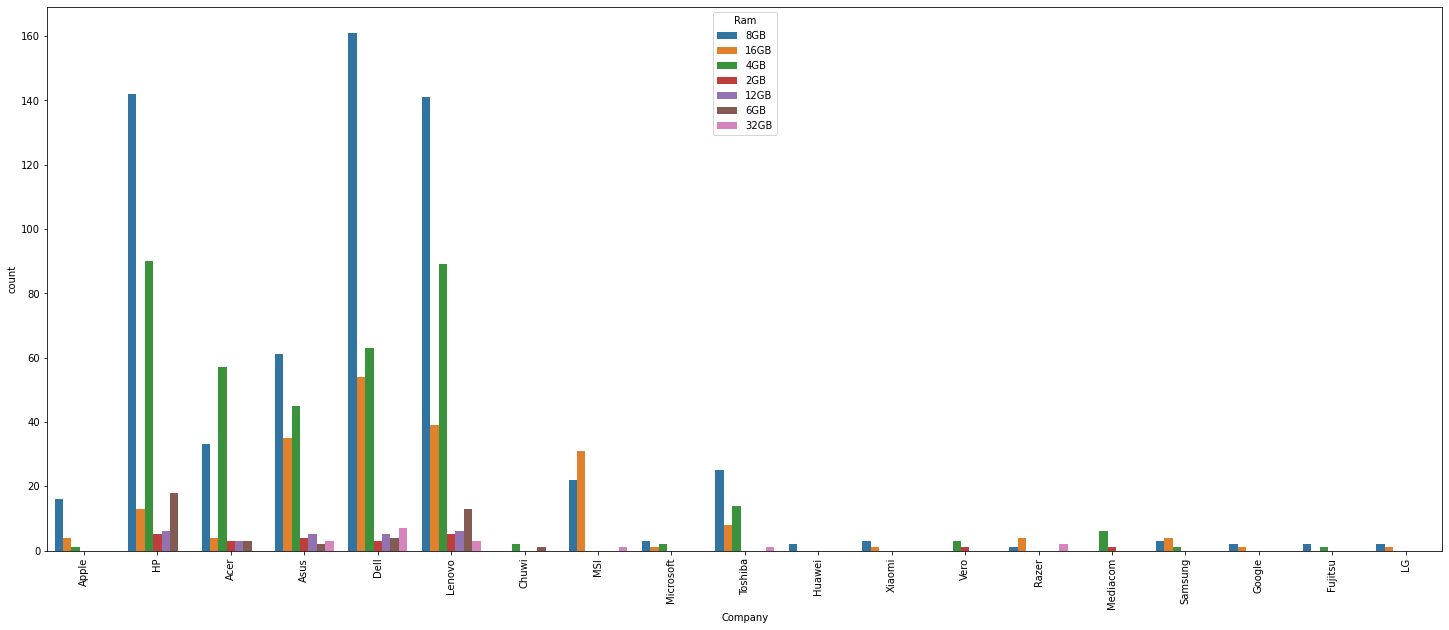

In [31]:
plt.figure(figsize=(25,10))
sns.countplot(Laptop['Company'],hue=Laptop['Ram'])
plt.xticks(rotation='vertical')
plt.show()

In [32]:
# Let's separate the numerical and categorical values present in the Ram and Weight Column

Laptop['Ram']=Laptop['Ram'].str.replace('GB','').astype(int)
Laptop['Weight']=Laptop['Weight'].str.replace('kg','').astype(float)

In [33]:
Laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company           1298 non-null   object  
 1   Product           1298 non-null   object  
 2   TypeName          1298 non-null   object  
 3   Inches            1298 non-null   float64 
 4   ScreenResolution  1298 non-null   object  
 5   Cpu               1298 non-null   object  
 6   Ram               1298 non-null   int32   
 7   Memory            1298 non-null   object  
 8   Gpu               1298 non-null   object  
 9   OpSys             1298 non-null   object  
 10  Weight            1298 non-null   float64 
 11  Price_euros       1298 non-null   float64 
 12  Inches_new        1297 non-null   category
 13  x_res             1298 non-null   int32   
 14  y_res             1298 non-null   int32   
 15  Cpu_Name          1298 non-null   object  
dtypes: category(1), float64(

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


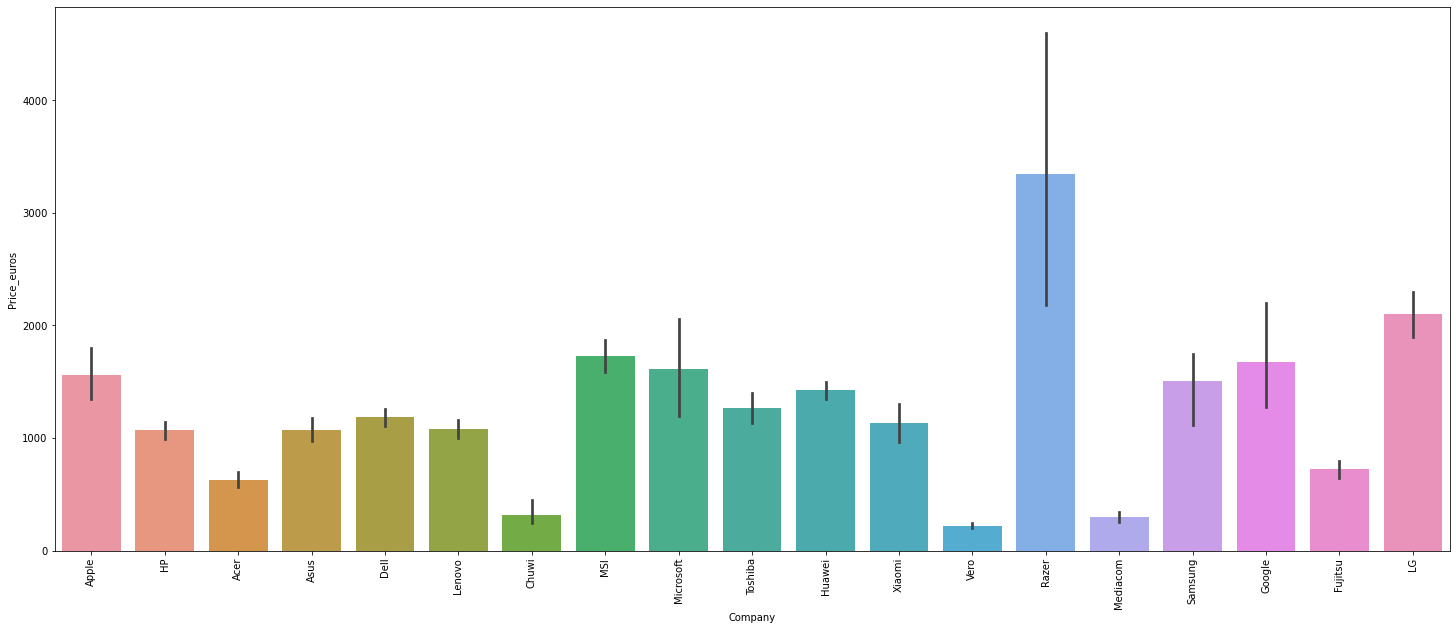

In [34]:
# Finding out which company's laptop has highest price
plt.figure(figsize=(25,10))
sns.barplot(Laptop['Company'],Laptop['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [35]:
Laptop['OpSys'].value_counts()

Windows 10      1068
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

Lets make a function where in will convert Windows version into Windows , Mac versions into Mac and NoOs,linux,Android,ChromeOs

into Other OS

In [36]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'


In [37]:
Laptop['Os']=Laptop['OpSys'].apply(cat_os)

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


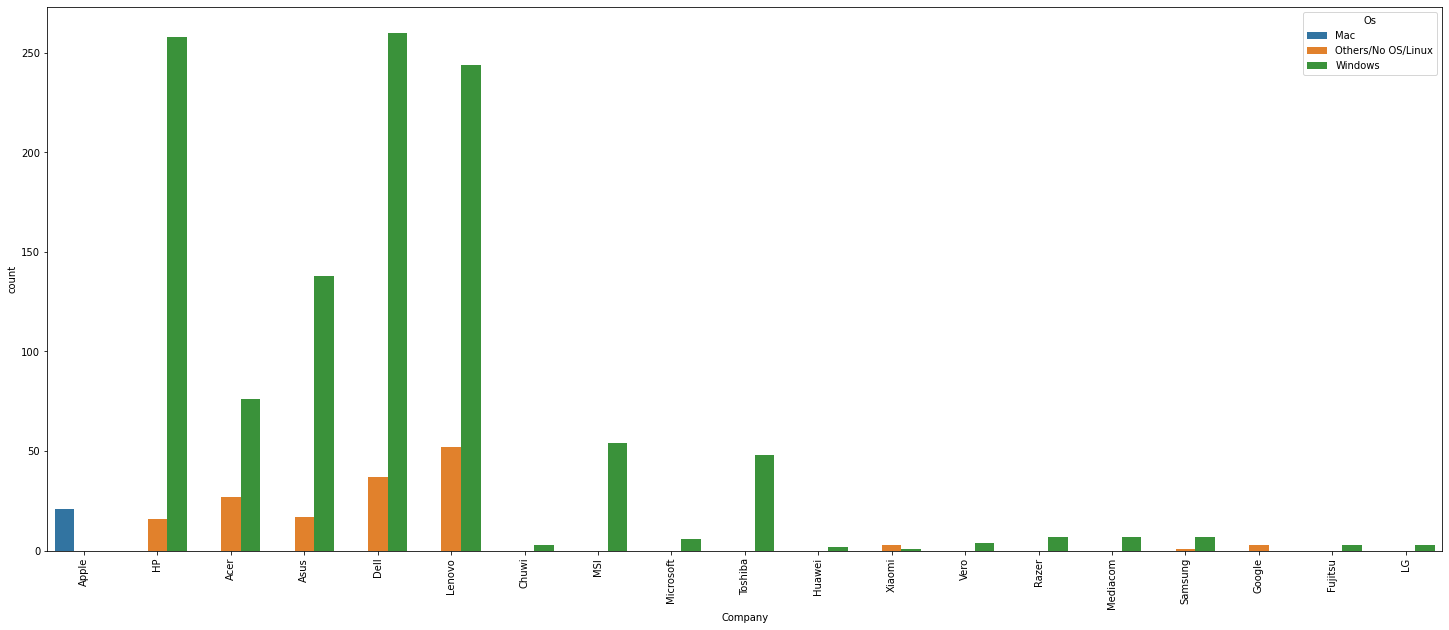

In [38]:
plt.figure(figsize=(25,10))
sns.countplot(Laptop['Company'],hue=Laptop['Os'])
plt.xticks(rotation='vertical')
plt.show()

In [39]:
Laptop.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Inches_new,x_res,y_res,Cpu_Name,Os
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel,macOS,1.37,1339.69,bin-2,2560,1600,Intel Core i5,Mac
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel,macOS,1.34,898.94,bin-2,1440,900,Intel Core i5,Mac


In [40]:
Laptop['ppi']=(((Laptop['x_res']**2) + (Laptop['y_res']**2))**0.5/Laptop['Inches']).astype('float')

In [41]:
Laptop.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Inches_new,x_res,y_res,Cpu_Name,Os,ppi
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel,macOS,1.37,1339.69,bin-2,2560,1600,Intel Core i5,Mac,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel,macOS,1.34,898.94,bin-2,1440,900,Intel Core i5,Mac,127.677940


In [42]:
Laptop=Laptop[['Company','TypeName','Ram','Weight','ppi','Cpu_Name','Gpu','Os','Price_euros']]

In [43]:
Laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 0 to 1302
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1298 non-null   object 
 1   TypeName     1298 non-null   object 
 2   Ram          1298 non-null   int32  
 3   Weight       1298 non-null   float64
 4   ppi          1298 non-null   float64
 5   Cpu_Name     1298 non-null   object 
 6   Gpu          1298 non-null   object 
 7   Os           1298 non-null   object 
 8   Price_euros  1298 non-null   float64
dtypes: float64(3), int32(1), object(5)
memory usage: 128.6+ KB


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


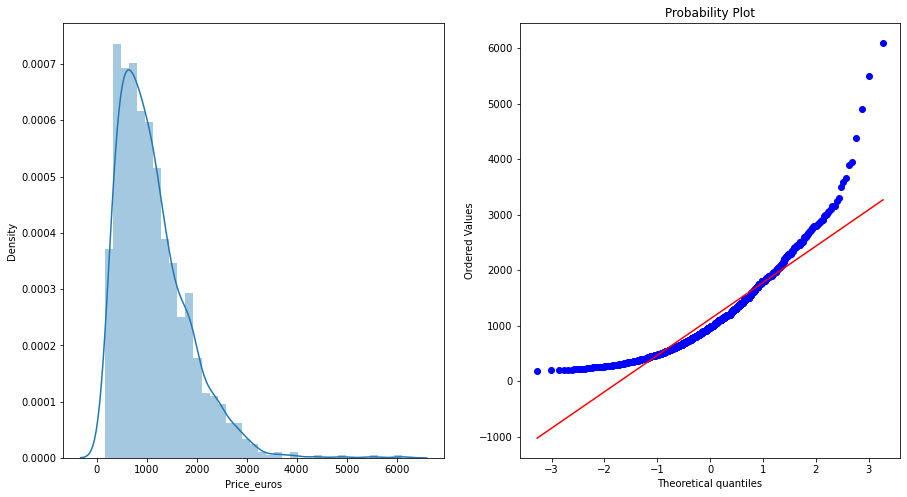

In [48]:
 # Function Transformer

plt.figure(figsize=(15,8))
plt.subplot(121)
sns.distplot(Laptop['Price_euros'])

plt.subplot(122)
stats.probplot(Laptop['Price_euros'],dist="norm",plot=plt)
plt.show()

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


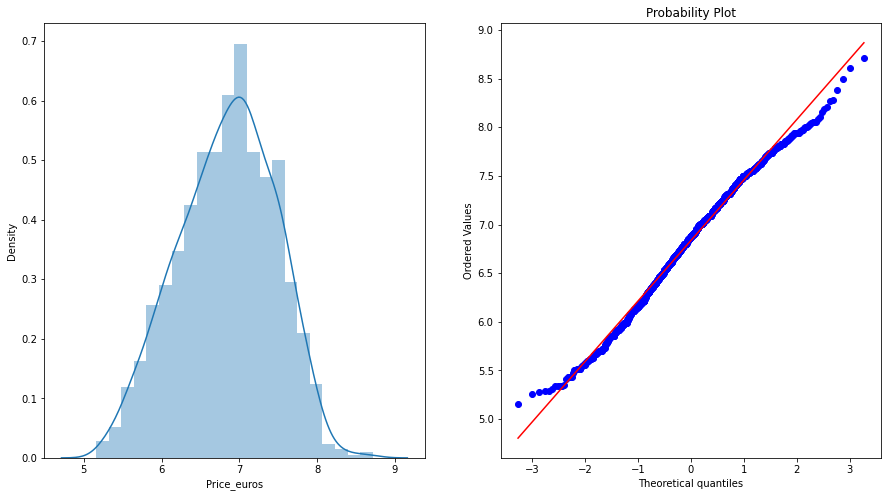

In [49]:
Laptop['Price_euros']=np.log(Laptop['Price_euros'])

plt.figure(figsize=(15,8))
plt.subplot(121)
sns.distplot(Laptop['Price_euros'])

plt.subplot(122)
stats.probplot(Laptop['Price_euros'],dist="norm",plot=plt)
plt.show()

In [50]:
Laptop.head()

,Company,TypeName,Ram,Weight,ppi,Cpu_Name,Gpu,Os,Price_euros
0,Apple,Ultrabook,8,1.37,226.983005,Intel Core i5,Intel,Mac,7.200194
1,Apple,Ultrabook,8,1.34,127.677940,Intel Core i5,Intel,Mac,6.801216
2,HP,Notebook,8,1.86,141.211998,Intel Core i5,Intel,Others/No OS/Linux,6.354370
3,Apple,Ultrabook,16,1.83,220.534624,Intel Core i7,AMD,Mac,7.838915
4,Apple,Ultrabook,8,1.37,226.983005,Intel Core i5,Intel,Mac,7.497540


In [51]:
X=Laptop.drop('Price_euros',axis=1)
y=Laptop['Price_euros']

In [52]:
X

,Company,TypeName,Ram,Weight,ppi,Cpu_Name,Gpu,Os
0,Apple,Ultrabook,8,1.37,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,226.983005,Intel Core i5,Intel,Mac
...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,157.350512,Intel Core i7,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,276.053530,Intel Core i7,Intel,Windows
1300,Lenovo,Notebook,2,1.50,111.935204,Other Intel Processor,Intel,Windows
1301,HP,Notebook,6,2.19,100.454670,Intel Core i7,AMD,Windows


In [53]:
y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: Price_euros, Length: 1298, dtype: float64

In [54]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Linear Regression

In [56]:
step1=ColumnTransformer(transformers=[
    ('trfl',OneHotEncoder(sparse=False,drop='first'),[0,1,5,6,7])
],remainder='passthrough')

step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

In [57]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trfl',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 5, 6, 7])])),
                ('step2', LinearRegression())])

In [58]:
y_test_predict=pipe.predict(X_test)
test_score=r2_score(y_test,y_test_predict)

In [59]:
test_score

0.8235443298656677